# Human Resource Analytics

### Table of Contents:

	1. Data to insights

	    1.1 Business Understanding
	    1.2 Analytic Solution
	    1.3 Feasability Study
	    1.4 Analytical Base Table

	2. Data Exploration
	
	    2.1 Data Quality Report
	    2.2 Data Cleaning
	    2.3 Data Visualisation
	
	        2.3.1 Conclusion
	
	3. Statistical Modelling
	
	    3.1 Modelling the satisfaction levels
	    3.2 Modelling the Average monthly hours worked
	    3.3 Modelling the Last evaluation scores
	    3.4 Hypothesis Testing the correlations
	    3.5 Conclusion
	
	4. Machine Learning
	
	    4.1 Parameter Fine Tuning
	
	        4.1.1 KNeighborsClassifier
	
	    4.2 Building the machine learning models
	
	        4.2.1 Model Scores
	        4.2.2 ROC Curve and AUC
	        4.2.3 Scaling
	        4.2.4 Feature Selection
	
	    4.3 Observations
	    4.4 Conclusion

# 1. Data to Insights

## 1.1 Business Understanding

The business problem under study here is why the best employees of this company
are leaving pre-maturely. The company also wants us to predict which employees
will be leaving next.

## 1.2 Analytic Solution

We have two main goals:

* We want to understand why the good employees leave
* Predict who will leave next

We propose working with the HR department to gather significant data that can
probably explain the cause and effect relationship under question.

## 1.3 Feasability Study

Managers in the HR department have not kept an organised report on why employees
have left but from the data we can determine this through sound data science
techniques.

From the data given we have the following information: For our 15000 employees:
satisfaction level, latest evaluation (yearly), number of project worked on,
average monthly hours, time spend in the company (in years), work accident
(within the past 2 years), promotion within the past 5 years, department and
salary.

## 1.4 Analytical Base Table

This is the data provided by the HR department:

In [1]:
import pandas as pd
df = pd.read_csv("HR_comma_sep.csv")
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 2. Data Exploration

Here our aim is to asses the quality of our data, rectify and clean the data where
it might suffer and run visualizations to help us understand our data graphically.

## 2.1 Data Quality Report

In [2]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


This table describe the characteristics of each features of our analytical base
table. We can see different statistical measures of central tendency and
variation. For example we can see that our attrition rate is equal to 24%, the
satisfaction level is around 62% and the performance average is around 71%. We
see that on average people work on 3 to 4 projects a year and about 200 hours
per months.

## 2.2 Data Cleaning

The data had a couple of incorrectly named column names.

In [3]:
df = df.rename(columns={
    'Work_accident': 'work_accident',
    'average_montly_hours': 'average_monthly_hours'
})

The data did not have any NULL values

In [4]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

The categorical variables were 'int64' type

In [5]:
# Convert required columns to categorical
df['salary'] = df['salary'].astype('category')
df['left'] = df['left'].astype('category')
df['department'] = df['sales'].astype('category')
df = df.drop('sales', 1)
df['promotion_last_5years'] = df['promotion_last_5years'].astype('category')
df['work_accident'] = df['work_accident'].astype('category')

There were duplicate rows of data

In [6]:
df = df.drop_duplicates()

In [7]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,department
0,0.38,0.53,2,157,3,0,1,0,low,sales
1,0.80,0.86,5,262,6,0,1,0,medium,sales
2,0.11,0.88,7,272,4,0,1,0,medium,sales
3,0.72,0.87,5,223,5,0,1,0,low,sales
4,0.37,0.52,2,159,3,0,1,0,low,sales


## 2.3 Data Visualization 

This section deals with the insights that we have obtained graphically. Our main aim
here is to obtain information regarding the employees who left and the employees who
stayed with the firm

In [8]:
# importing the neccesary packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

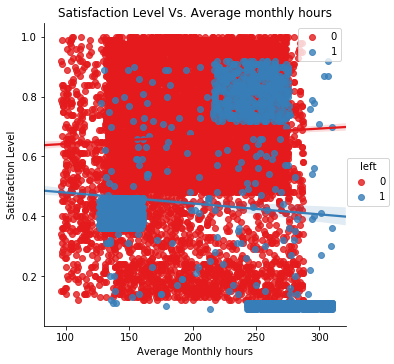

In [9]:
sns.lmplot(x='average_monthly_hours', y='satisfaction_level',data=df, hue='left', 
           palette='Set1')
plt.xlabel("Average Monthly hours")
plt.ylabel("Satisfaction Level")
plt.title("Satisfaction Level Vs. Average monthly hours")
plt.legend()
plt.show()

The plot above is a scatterplot between Satisfaction levels of the employees and the average monthly hours worked by the employee. The employees who have left the
firm are in blue while the employees who have stayed in the firm are in red. 

We can observe that the bulk of the employees who have left the firm have worked between **225 to 275 hours** and have satisfaction levels between **0.7 to 0.9.**

The next chunk of employees that have left the firm have worked between **130 to 160 hours** and have **lower satisfaction levels of 0.3 to 0.5**.

The final set of employees who have left the firm have worked between **245 to 320 hours** have the lowest satisfaction levels in the range of **0 to 0.15**.

This clearly shows us that employees who work more hours for the firm and have high satisfaction levels have indeed left the firm. 

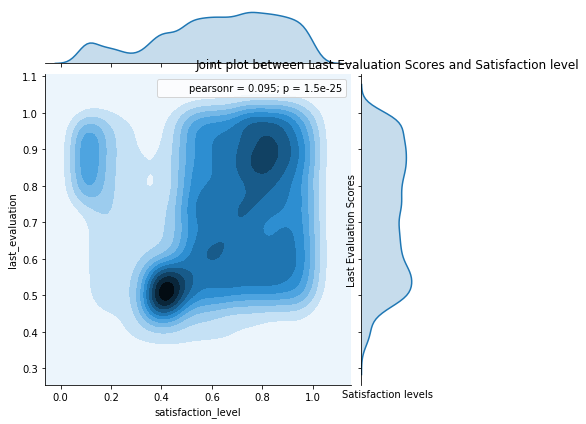

In [10]:
sns.jointplot(x="satisfaction_level", y="last_evaluation", data=df, kind='kde')
plt.xlabel("Satisfaction levels")
plt.ylabel("Last Evaluation Scores")
plt.title("Joint plot between Last Evaluation Scores and Satisfaction level")
plt.show()

The joint density plot above shows us a lot of employees in the firm have low 
satisfaction levels in the range of 0.35 to 0.45. These employees also have 
lower scores in their last evaluation. This shows us that the people who are
not satisfied do not perform well on their jobs in the firm. 

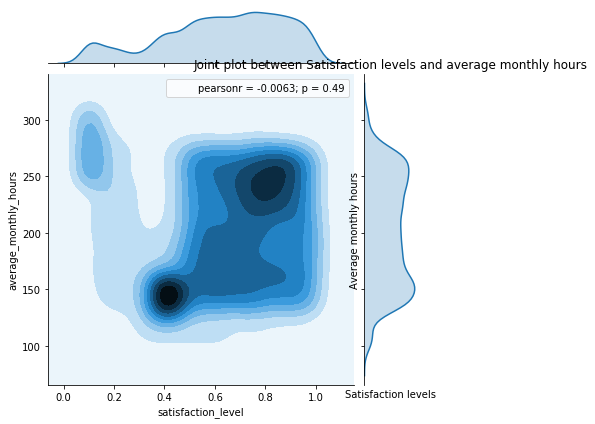

In [11]:
sns.jointplot(x="satisfaction_level",y="average_monthly_hours", data=df, kind='kde')
plt.xlabel("Satisfaction levels")
plt.ylabel("Average monthly hours")
plt.title("Joint plot between Satisfaction levels and average monthly hours")
plt.show()

The joint density plot above shows us that the bulk of the employees either had 
low satisfaction levels (0.35 to 0.45) and correspondly low working hours 
(125 to 160 hours). 
They also have high satisfaction levels (0.7 to 0.9) and correspondly high average 
working hours (220 to 260) hours. This shows us the employees in the company do not 
lead very balanced lives. They either work too much or too little and have really 
high or really low satisfaction levels. 

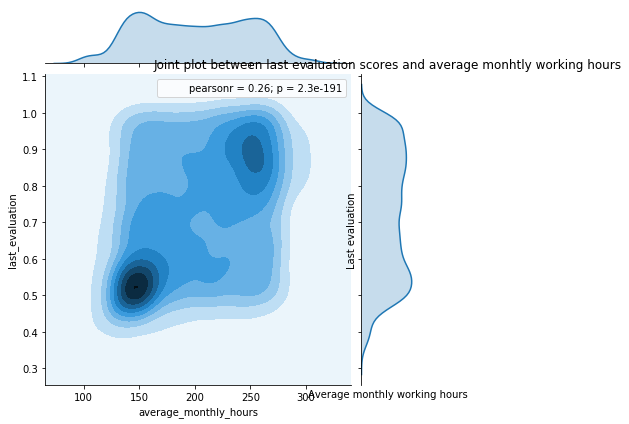

In [12]:
sns.jointplot(x="average_monthly_hours", y="last_evaluation", data=df, kind='kde')
plt.xlabel("Average monthly working hours")
plt.ylabel("Last evaluation")
plt.title("Joint plot between last evaluation scores and average monhtly working hours")
plt.show()

From the plot above we can infer that most of the employees who between 130 to 
150 hours amonth have correspondingly low last evaluation scores between 0.45 
to 0.55. This may tell us the that the organisation values the time put in by 
the employee over the quality of work produced which might be why the good 
employees have left the firm. 

The plots shown below help us understand the distribution of continous variables in the 
dataset.

In [13]:
# Defining the percentiles we want

percentiles = np.array([25, 50, 75])

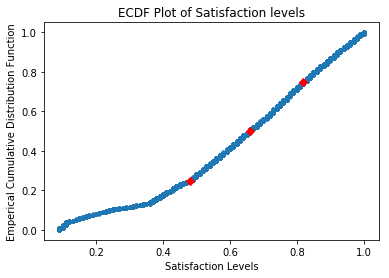

In [14]:
#Emperical Cumulative Distribution Function plot for Satisfaction levels
ptiles = np.percentile(df['satisfaction_level'], percentiles)
x = np.sort(df['satisfaction_level'])
y = np.arange(1, len(x) + 1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(ptiles, percentiles / 100, marker='D',
             color='red', linestyle='none')
plt.xlabel("Satisfaction Levels")
plt.ylabel("Emperical Cumulative Distribution Function")
plt.title("ECDF Plot of Satisfaction levels")
plt.show()

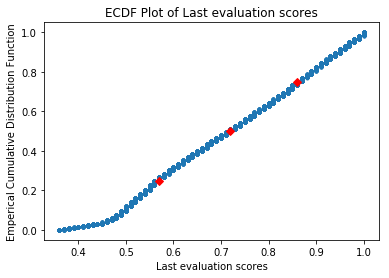

In [15]:
#ECDF plot for last evaluation scores
ptiles = np.percentile(df['last_evaluation'], percentiles)
x = np.sort(df['last_evaluation'])
y = np.arange(1, len(x) + 1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(ptiles, percentiles / 100, marker='D',
             color='red', linestyle='none')
plt.xlabel("Last evaluation scores")
plt.ylabel("Emperical Cumulative Distribution Function")
plt.title("ECDF Plot of Last evaluation scores")
plt.show()

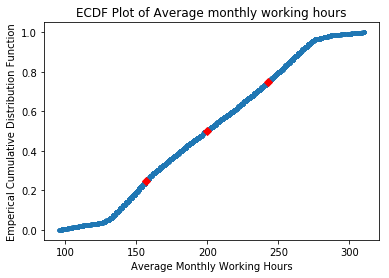

In [16]:
#ECDF plot for average monthly working hours
ptiles = np.percentile(df['average_monthly_hours'], percentiles)
x = np.sort(df['average_monthly_hours'])
y = np.arange(1, len(x) + 1) / len(x)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(ptiles, percentiles / 100, marker='D',
             color='red', linestyle='none')
plt.xlabel("Average Monthly Working Hours")
plt.ylabel("Emperical Cumulative Distribution Function")
plt.title("ECDF Plot of Average monthly working hours")
plt.show()

From the ECDF plot for satisfaction levels we can understand that the mean 
satisfaction levels in the firm are slightly above average(0.67). We can 
also observe that the lower 25th percentile of satisfaction levels are not 
that low (0.45). Employees seem pretty satisfied in the firm. 

The last evaluation scores in the firm are also quite high and all above 
average for the 25th, 50th and 75th percentiles.

The employees in the firm worked 200 hours every month on average with the 
ECDF plot following a normal distribution.

Next, lets take a look at how employees performed in the organisation based 
on their salary levels using the violin plot.

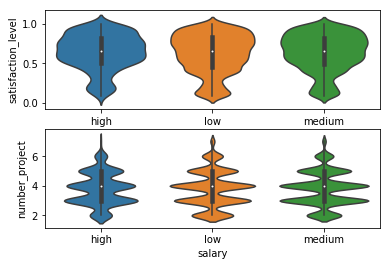

In [17]:
plt.subplot(2,1,1)
sns.violinplot(x='salary', y='satisfaction_level', data=df)

plt.subplot(2,1,2)
sns.violinplot(x='salary', y='number_project', data=df)

plt.show()

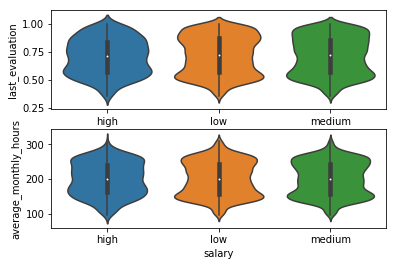

In [18]:
plt.subplot(2,1,1)
sns.violinplot(x='salary', y='last_evaluation', data=df)

plt.subplot(2,1,2)
sns.violinplot(x='salary', y='average_monthly_hours', data=df)

plt.show()

From the 4 plots above we can observe that the distributions for the 
satisfaction levels,number of projects, last evaluation scores and the 
average monthly working hours of the employees are more or less the same 
across all three levels of salaries - Low (0), Medium (1) and High(2).

Next we will take a look at some histograms that shows us the comparison 
between the employees who stayed and the emloyees who left the firm. 

* The first set of histograms shows us the factors that have little to NO 
influence on the employees who left and the employees who stayed because both
the histograms under comparison are similar in distribution.
* The second set of histograms shows us the factors that have some to 
significant influence on the employees who left and the employees who stayed 
becuase the two histograms under comparison have different distributions.

In the histograms below:
    
* 0 stands for the employees who stayed with the firm.
* 1 stands for the employees who left the firm.

Histograms where the factors have no influence on the employees who left or stayed:

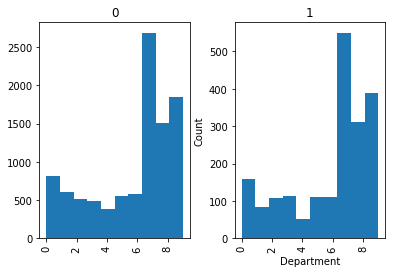

In [19]:
df['department'].cat.codes.hist(by=df['left'])
plt.xlabel("Department")
plt.ylabel("Count")
plt.show()

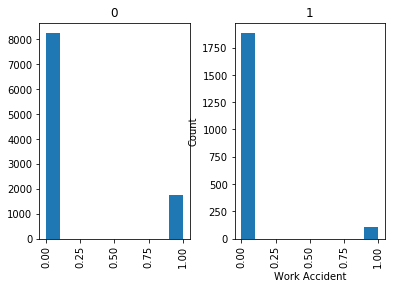

In [20]:
df['work_accident'].hist(by=df['left'])
plt.xlabel("Work Accident")
plt.ylabel("Count")
plt.show()

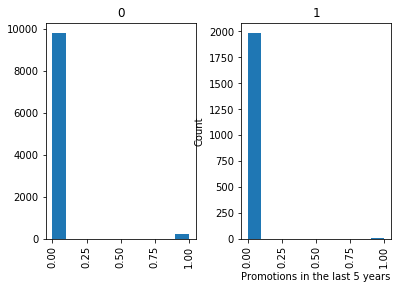

In [21]:
df['promotion_last_5years'].hist(by=df['left'])
plt.xlabel("Promotions in the last 5 years")
plt.ylabel("Count")
plt.show()

Histograms where the factors have influence on the employees who left or stayed:

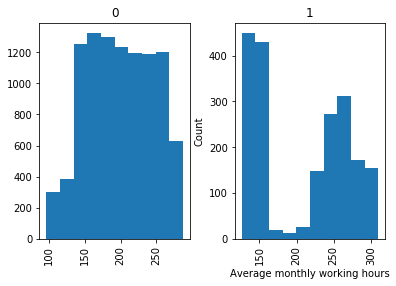

In [22]:
df['average_monthly_hours'].hist(by=df['left'])
plt.xlabel("Average monthly working hours")
plt.ylabel("Count")
plt.show()

In the histogram above, for the employees who left the firm we can observe: 

* The maximum number of employees that left the firm were those who had really
low workinghours (Lesser than 160) and those who had higher working hours 
(Between 230 to 270).
* Employees stayed with the firm when the working hours were between 160 to 220
every month. 

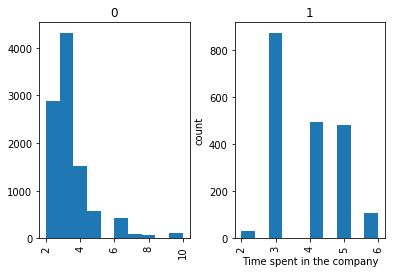

In [23]:
df['time_spend_company'].hist(by=df['left'])
plt.xlabel("Time spent in the company")
plt.ylabel("count")
plt.show()

In the histogram above, for the employees who left the firm we can observe: 
    
* The maximum number of employees left the firm after working for 3 years. 
* The number of employees leaving the firm is minimum at (0 to 2) years 
and 6 years but is consistently high between 4 to 5 years with the firm.

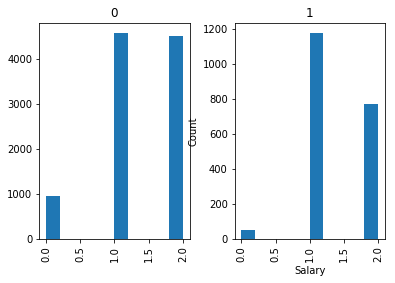

In [24]:
df['salary'].cat.codes.hist(by=df['left'])
plt.xlabel("Salary")
plt.ylabel("Count")
plt.show()

In the histogram above, for the employees who left the firm we can observe: 

* The maximum number of employees who left the firm were those who got a mid 
level salary
* The least number of employees who left the firm were those who got a low level 
salary

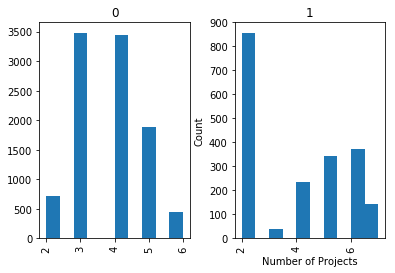

In [25]:
df['number_project'].hist(by=df['left'])
plt.xlabel("Number of Projects")
plt.ylabel("Count")
plt.show()

In the histogram above for the employees who left the firm we can observe:

* The maximum number of employees who left the firm only did 2 projects for the firm.
* The least number of employees who left the firm did 3 projects for the firm.

Next lets take a look at how the different factors like monthly working hours,
satisfaction levels and last evaluation scores vary by the different departments:

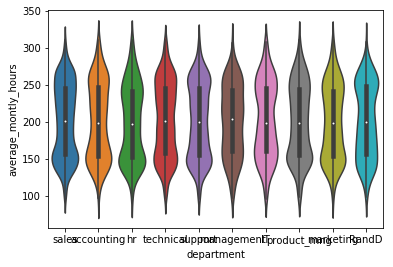

In [26]:
raw_df = pd.read_csv("HR_comma_sep.csv")
raw_df['department'] = raw_df['sales']
sns.violinplot(x='department', y='average_montly_hours', data=raw_df)
plt.show()

In the violin plot above we can observe how the distribution of average 
monthly working hours is distributed equally throughout all the departments
indicating that all departments worked almost the same number of hours every 
month.

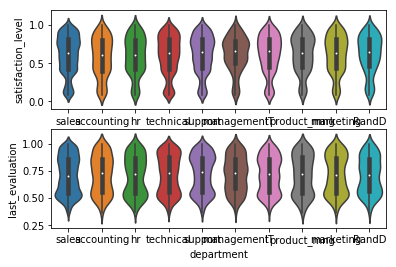

In [27]:
plt.subplot(2,1,1)
sns.violinplot(x='department', y='satisfaction_level', data=raw_df)

plt.subplot(2,1,2)
sns.violinplot(x='department', y='last_evaluation', data=raw_df)

plt.show()

We can also notice how the Satisfaction levels and the last evaluation scores
are distributed equally across all departments in the firm. 

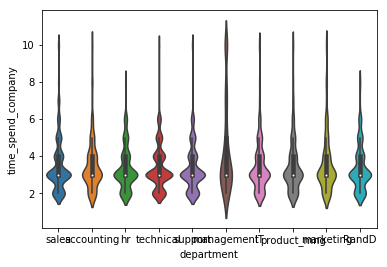

In [28]:
sns.violinplot(x='department', y='time_spend_company', data=raw_df)
plt.show()

What is different is the time spend in the firm. 
*Notice how the employees in the HR and R and D departments spend lesser time 
in the firm compared to the rest of firm.
*We can also notice how the management department spends the longest time in 
the firm.
*This might indicate that the management is to blame for employees leaving the firm.

Next we will visualize a series of boxplots to see the difference the median values 
of factors between the employees who left the firm and the employees who stayed with 
the firm.

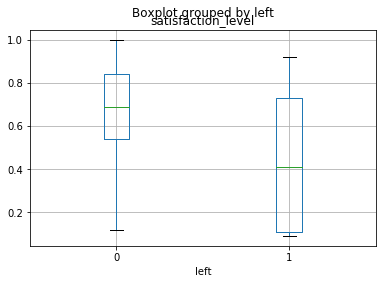

In [29]:
df.boxplot(column='satisfaction_level', by='left')
plt.show()

In the boxplot above we can notice:
    
* The median value of the satisfaction levels of the employees who left are lower 
than the employees who stayed
* We can also observe that the satisfaction levels of the meployees who left are 
indeed lower than the employees who stayed.

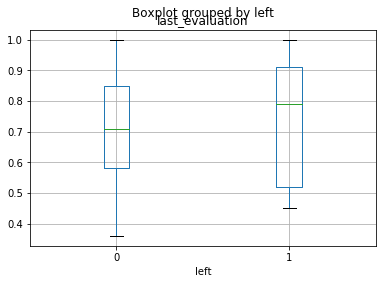

In [30]:
df.boxplot(column='last_evaluation', by='left')
plt.show()

In the boxplot we can observe:
    
* The median last evaluation scores of the employees who left the firm were
indeed greater than the employees who stayed suggesting that the good 
employees did indeed leave the firm.

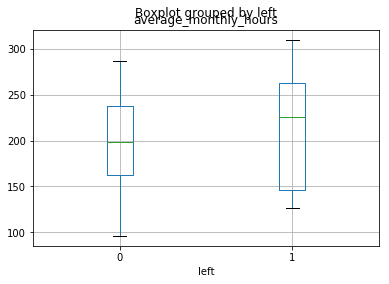

In [31]:
df.boxplot(column='average_monthly_hours', by='left')
plt.show()

In the boxplot above we can notice:

* That the median number of hours worked by the employees who left the
firm were higher than the median hours worked by the employees who 
stayed with the firm suggesting that they could be overworked. 

### 2.3.1 Conclusion

From the visualizations carried above we have come to understand the 
following about the employees who left the firm:
    
* The employees who left the firm did indeed have a better performance than the employees who stayed with the firm.
* The employees who left the firm had lower satisfaction levels
* The employees who left the firm were made to work longer hours monthly.
* The management department stayed the longest number of years with the firm suggesting that the employees in the other departments could have had issues with the management.
* Employees who were given lesser projects were more likely to leave the firm.
* Employees having a mid level salary were more likely to leave the firm.
* Employees who worked really less number of hours or worked a high number of hours were more likely to leave the firm.
* Employee were more likely to leave the firm after working for 3 years.

# 3 Statistical Modelling

The aim of statistical modelling is to verify the authencitiy of the quality of
the data that we have gotten from the HR department. 

## 3.1 Modelling the Satisfaction levels

In [32]:
# function to compute ECDF
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1)/n
    return x, y

In [33]:
# function to plot theoretical and actual distribution
def plot_theoretical_and_actual(column, label, exp=False):
    mean = np.mean(column)
    std = np.std(column)
    
    if exp:
        samples = np.random.exponential(mean, size=1000)
    else:
        samples = np.random.normal(mean, std, size=1000)  
    
    x, y = ecdf(column)
    x_theor, y_theor = ecdf(samples)
    
    plt.plot(x_theor, y_theor)
    plt.plot(x, y, marker='.', linestyle='none')
    
    plt.xlabel(label)
    plt.ylabel('CDFs')
    
    plt.show()

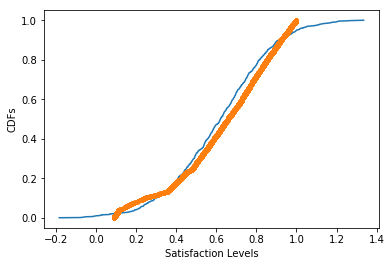

In [34]:
# Comparing Theoretical and Actual Distributons of Satisfaction levels
plot_theoretical_and_actual(df['satisfaction_level'],
                           'Satisfaction Levels')

In the plot above we have compared the theoretical distiribution (blue) of the
satisdaction levels with the actual distribution (green) obtained from the 
data to check if it follows a normal distribution.

From the plot above we can say:

* The satisfaction levels are not EXACTLY normally distributed but is close to
being normally distributed.

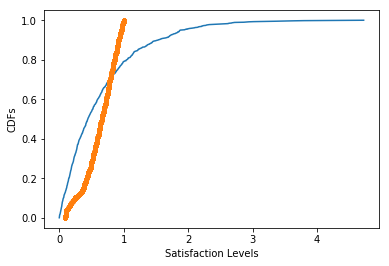

In [35]:
# Comparing Theoretical and Actual distribution for satisfaction levels (Exponential)

plot_theoretical_and_actual(df['satisfaction_level'],
                           'Satisfaction Levels',
                           exp=True)

In the plot above we have compared the theoretical distiribution (blue) of the
satisfaction levels with the actual distribution (green) obtained from the 
data to check if it follows a exponential distribution.

From the plot above we can say:

* Satisfaction levels are not exponentially distributed at all. 

We are now going to bootstrap in order to find the 95% confidence levels of 
various parameters like the mean, standard deviation, median and variance of the 
satisfaction level.

In [36]:
def bootstrap_replicates(data, func):
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [37]:
bs_replicates_mean = np.empty(100000)
bs_replicates_var = np.empty(100000)
bs_replicates_std = np.empty(100000)
bs_replicates_median = np.empty(100000)

In [38]:
for i in range(100000):
    bs_replicates_mean[i] = bootstrap_replicates(
        df["satisfaction_level"], np.mean)
    bs_replicates_median[i] = bootstrap_replicates(
        df["satisfaction_level"], np.median)

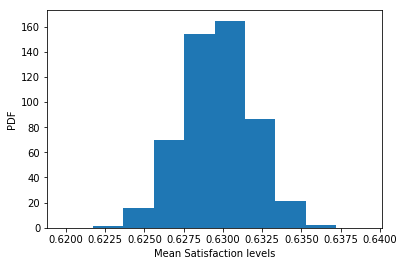

In [39]:
plt.hist(bs_replicates_mean, normed=True)
plt.xlabel("Mean Satisfaction levels")
plt.ylabel("PDF")
plt.show()

In [40]:
conf_int_mean = np.percentile(bs_replicates_mean, [2.5, 97.5])
print("Mean:  {:.2f} and {:.2f}".format(
    conf_int_mean[0], conf_int_mean[1]))

Mean:  0.63 and 0.63


From the histogram above we can see that after bootstrapping 100,000 samples:
    
* The mean of the satisfaction levels in the firm was 0.63 with a 95% confidence
interval. 
* The mean of the satisfaction levels in the firm from the dataset handed to us
by the HR department was 0.63 and hence the boostrapped mean is exactly the same
as the mean provided in the dataset and hence we can be sure that the mean
satisfaction levels in the firm was 0.63.

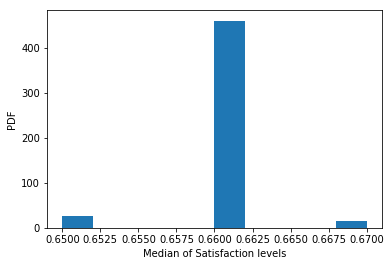

In [41]:
plt.hist(bs_replicates_median, normed=True)
plt.xlabel("Median of Satisfaction levels")
plt.ylabel("PDF")
plt.show()

In [42]:
conf_int_median = np.percentile(bs_replicates_median, [2.5, 97.5])
print("Median: {:.2f} and {:.2f}".format(
    conf_int_median[0], conf_int_median[1]))

Median: 0.65 and 0.67


From the histogram above we can see that after bootstrapping 100,000 samples:
    
* The median of the satisfaction levels in the firm was between 0.65 and 0.67 
with a 95% confidence interval.
* THe median satisfaction levels in the firm from the dataset provided by the 
HR department was 0.66 and hence we can be sure that the median satisfaction 
levels in the firm would be between 0.65 and 0.67 even if the data collection
were carried out a 100,000 times.

## 3.2 Modelling the Average monthly hours worked

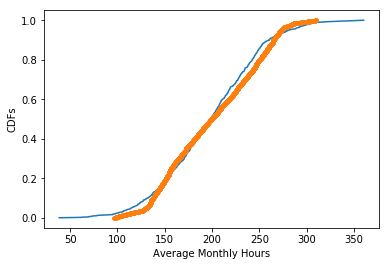

In [43]:
# Comparing theoretical (Normal) and actual distribution 

plot_theoretical_and_actual(df['average_monthly_hours'],
                           'Average Monthly Hours')

In the plot above we have compared the theoretical distiribution (blue) of the
average monthly hours with the actual distribution (green) obtained from the 
data to check if it follows a normal distribution.

From the plot above we can say:

* The satisfaction levels are not EXACTLY normally distributed but is close to
being normally distributed.

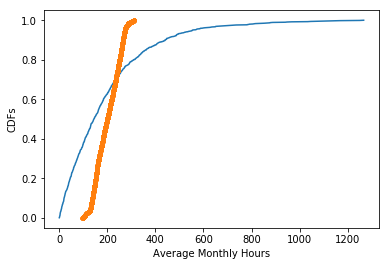

In [44]:
# Comparing theoretical (Exponential) and actual distribution

plot_theoretical_and_actual(df['average_monthly_hours'],
                           'Average Monthly Hours',
                           exp=True)

In the plot above we have compared the theoretical distiribution (blue) of the
average monthly hours with the actual distribution (green) obtained from the 
data to check if it follows a exponential distribution.

From the plot above we can say:

* Satisfaction levels are not exponentially distributed at all. 

We are now going to bootstrap in order to find the 95% confidence levels of 
various parameters like the mean, standard deviation, median and variance of the 
satisfaction level.

In [45]:
bs_replicates_mean = np.empty(100000)
bs_replicates_var = np.empty(100000)
bs_replicates_std = np.empty(100000)
bs_replicates_median = np.empty(100000)

In [46]:
for i in range(100000):
    bs_replicates_mean[i] = bootstrap_replicates(
        df["average_monthly_hours"], np.mean)
    bs_replicates_median[i] = bootstrap_replicates(
        df["average_monthly_hours"], np.median)

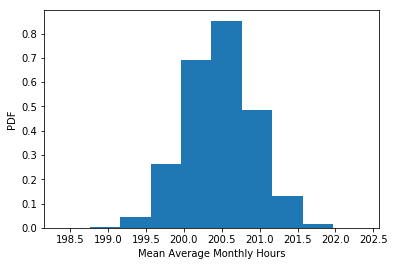

In [47]:
plt.hist(bs_replicates_mean, normed=True)
plt.xlabel("Mean Average Monthly Hours")
plt.ylabel("PDF")
plt.show()

In [48]:
conf_int_mean = np.percentile(bs_replicates_mean, [2.5, 97.5])
print("Mean:  {:.2f} and {:.2f}".format(
    conf_int_mean[0], conf_int_mean[1]))

Mean:  199.60 and 201.35


From the histogram above we can see that after bootstrapping 100,000 samples:
    
* The mean of the average monthly hours in the firm was between 199.60 and 201.34 
hours with a 95% confidence interval. 
* The mean of the average monthly hours in the firm from the dataset provided by 
the HR department was 200.47 and hence it is between 199.60 and 201.34. Hence we 
can be 95% sure that the mean of 200.47 as observed in the dataset is accurate
even if the data collection were carried out a 100,000 times. 

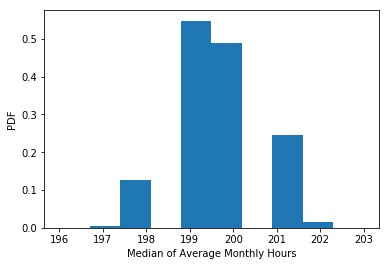

In [49]:
plt.hist(bs_replicates_median, normed=True)
plt.xlabel("Median of Average Monthly Hours")
plt.ylabel("PDF")
plt.show()

In [50]:
conf_int_median = np.percentile(bs_replicates_median, [2.5, 97.5])
print("Median: {:.2f} and {:.2f}".format(
    conf_int_median[0], conf_int_median[1]))

Median: 198.00 and 201.00


From the histogram above we can see that after bootstrapping 100,000 samples:
    
* The median of the average monthly hours in the firm was between 198 and 201 
hours with a 95% confidence interval. 
* The median of the average monthly hours in the firm from the dataset provided by 
the HR department was 200 and hence it is between 198 and 201. Hence we 
can be 95% sure that the mean of 200 as observed in the dataset is accurate
even if the data collection were carried out a 100,000 times. 

## 3.3 Modelling the last evaluation scores

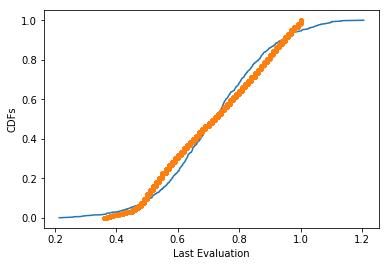

In [51]:
# checking out the distribution of the `last_evaluation` column

# Comparing theoretical (Normal) and actual distribution

plot_theoretical_and_actual(df['last_evaluation'],
                           'Last Evaluation')

In the plot above we have compared the theoretical distiribution (blue) of the
last evaluation scores with the actual distribution (green) obtained from the 
data to check if it follows a normal distribution.

From the plot above we can say:

* The satisfaction levels are not EXACTLY normally distributed but is almost close 
to being normally distributed.

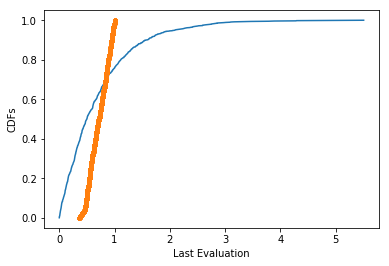

In [52]:
# Comparing theoretical (Exponential) and actual distribution

plot_theoretical_and_actual(df['last_evaluation'],
                           'Last Evaluation',
                           exp=True)

In the plot above we have compared the theoretical distiribution (blue) of the
Last evaluation scores with the actual distribution (green) obtained from the 
data to check if it follows a exponential distribution.

From the plot above we can say:

* Last evaluation scores are not exponentially distributed at all. 

In [53]:
bs_replicates_mean = np.empty(100000)
bs_replicates_var = np.empty(100000)
bs_replicates_std = np.empty(100000)
bs_replicates_median = np.empty(100000)

In [54]:
for i in range(100000):
    bs_replicates_mean[i] = bootstrap_replicates(
        df["last_evaluation"], np.mean)
    bs_replicates_median[i] = bootstrap_replicates(
        df["last_evaluation"], np.median)

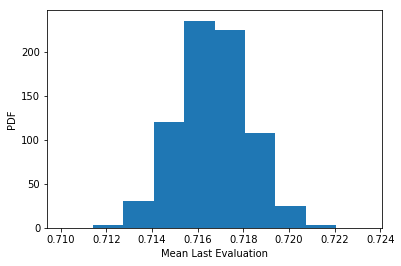

In [55]:
plt.hist(bs_replicates_mean, normed=True)
plt.xlabel("Mean Last Evaluation")
plt.ylabel("PDF")
plt.show()

In [56]:
conf_int_mean = np.percentile(bs_replicates_mean, [2.5, 97.5])
print("Mean:  {:.2f} and {:.2f}".format(
    conf_int_mean[0], conf_int_mean[1]))

Mean:  0.71 and 0.72


From the histogram above we can see that after bootstrapping 100,000 samples:
    
* The mean of the last evaluation scores in the firm was between 0.71 and 0.72 
with a 95% confidence interval. 
* The mean of the last evaluation scores in the firm from the dataset provided by 
the HR department was 0.716 and hence it is between 0.71 and 0.72. Hence we 
can be 95% sure that the mean of 0.716 as observed in the dataset is accurate
even if the data collection were carried out a 100,000 times. 

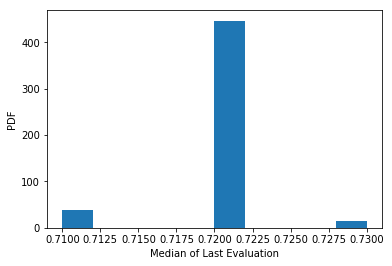

In [57]:
plt.hist(bs_replicates_median, normed=True)
plt.xlabel("Median of Last Evaluation")
plt.ylabel("PDF")
plt.show()

In [58]:
conf_int_median = np.percentile(bs_replicates_median, [2.5, 97.5])
print("Median: {:.2f} and {:.2f}".format(
    conf_int_median[0], conf_int_median[1]))

Median: 0.71 and 0.73


From the histogram above we can see that after bootstrapping 100,000 samples:
    
* The median of the last evaluation scores in the firm was between 0.71 and 0.73 
with a 95% confidence interval. 
* The median of the last evaluation scores in the firm from the dataset provided by 
the HR department was 0.719 and hence it is between 0.71 and 0.73. Hence we 
can be 95% sure that the median of 0.719 as observed in the dataset is accurate
even if the data collection were carried out a 100,000 times. 

## 3.4 Hypothesis Testing the correlations

In the section below we are going to compute the correlation coefficients 
between the continous variables and see how strongly correlated they are
are verify it using a hypothesis test

In [59]:
# Converting all interested columns to float

# Converting columns to float
df['satisfaction_level'] = df['satisfaction_level'].astype('float')
df['last_evaluation'] = df['last_evaluation'].astype('float')
df['average_monthly_hours'] = df['average_monthly_hours'].astype('float')
satisfaction = df['satisfaction_level']
last = df['last_evaluation']
average = df['average_monthly_hours']

In [60]:
# Creating a functon to compute the pearson correlation coeff 
def pearson_r(x, y):
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]

# Computing the pearson correlation coeff between satisfaction levels and last 
# evaluation
r = pearson_r(satisfaction, last)
print("Corr Coeff of Satisfacton levels and last evaluation scores : ", r)

# Computing the pearson correlation coeff between satisfaction levels and average
# monthly working hours
r = pearson_r(satisfaction, average)
print("Corr Coeff of Satisfacton levels and average monthly working hours : ", r)

# Computing the pearson correlation coeff between last evaluation and average 
# monthly working hours
r = pearson_r(last, average)
print("Corr Coeff of average monthly hours and last evaluation scores : ", r)

Corr Coeff of Satisfacton levels and last evaluation scores :  0.095185953717
Corr Coeff of Satisfacton levels and average monthly working hours :  -0.00625235499578
Corr Coeff of average monthly hours and last evaluation scores :  0.264677550673


In the hypothesis test below:
    
* Null hypothesis: There is NO weak positive correlation between Last evaluation
scores and the average monthly hours worked
* Alternate Hypothesis: There is a weak positive correlation between Last 
evaluation scores and the average monthly hours worked. 

In [61]:
# Hypothesis test to see if there a weak negative correlation between last 
# evaluation and average monthly working hours

r_obs = pearson_r(last, average)

perm_replicates = np.empty(120000)
for i in range(120000):
    last_permuted = np.random.permutation(last)
    perm_replicates[i] = pearson_r(last_permuted, average)
    
#Computing the p value
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


From the hypothesis test we can conclude that:
    
* Since the p value is 0, we can conclude that we reject the NULL hypothesis 
and accept the alternate hypothesis which is that there is indeed a weak
positive correlation between average monthly hours worked and last evaluation
scores.

In the hypothesis test below:
    
* Null hypothesis: There is a weak negative correlation between satisfaction 
levels and the average monthly hours worked
* Alternate Hypothesis: There is no weak negative correlation between  
satisfaction levels and the average monthly hours worked. 

In [62]:
# Hypothesis test to see if there a weak negative correlation between satisfaction 
# levels and average monthly working hours

r_obs = pearson_r(satisfaction, average)

perm_replicates = np.empty(120000)
for i in range(120000):
    satisfaction_permuted = np.random.permutation(satisfaction)
    perm_replicates[i] = pearson_r(satisfaction_permuted, average)
    
# Computing the p value
p = np.sum(perm_replicates <= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.247483333333


From the hypothesis test we can conclude:
    
* Since the p value is 0.245, we can conclude that we accept the NULL hypothesis 
and reject the alternate hypothesis which is that there is indeed a weak
negative correlation between average monthly hours worked and satisfaction
levels.

In the hypothesis test below:
    
* Null hypothesis: There is a weak postive correlation between satisfaction 
levels and the last evaluation scores
* Alternate Hypothesis: There is no weak negative correlation between  
satisfaction levels and the last evaluations.

In [63]:
# Hypothesis test to see if there a weak positive correlation between satisfaction 
# levels and last evaluation scores

r_obs = pearson_r(satisfaction, last)

perm_replicates = np.empty(120000)
for i in range(120000):
    satisfaction_permuted = np.random.permutation(satisfaction)
    perm_replicates[i] = pearson_r(satisfaction_permuted, last)
    
# Computing the p value
p = np.sum(perm_replicates <= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 1.0


From the hypothesis test we can conclude:
    
* Since the p value is 1, we can conclude that we accept the NULL hypothesis 
and reject the alternate hypothesis which is that there is indeed a weak
positive correlation between last evaluation scores and satisfaction
levels.

# 3.5 Conclusion

From the statisical modelling carried out above we have achieved the following:
    
* We were able to confirm the type of distributions the contious variables in the 
dataset had.
* We were able to verify the mean and median values using the Bootstrapping 
technique with a 95% confidence interval. 
* We were able to conduct hypothesis tests to verify the correlation between the
cointinous variables.

# 4 Machine Learning

Three algorithms are compared here:
    
* K Nearest Neighbors Classification
* Logistic Regression
* Decision Trees

Each model is trained and tested with the same train-test split of the original 
dataframe.
The ROC Curve is plotted and the AUC is calculated for each algorithm.

In [64]:
from sklearn.model_selection import train_test_split

In [65]:
# The categorical columns are one-hot encoded

X = pd.get_dummies(df.drop('left', axis=1)).values
y = df['left'].cat.codes.values

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## 4.1 Parameter Fine Tuning

Before running the machine learning models, the parameters for each of the models 
have to be chosen.

### 4.1.1 KNeighborsClassifier

The parameter n_neighhors is to be determined

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
knn = KNeighborsClassifier(n_neighbors=6)

In [71]:
param_grid = {'n_neighbors': np.arange(3, 15)}
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)
knn_cv.best_params_

{'n_neighbors': 8}

# 4.2 Building the machine learning models

In [72]:
knn = KNeighborsClassifier(n_neighbors=8)
logreg = LogisticRegression()
tree = DecisionTreeClassifier()

classification_models = {
    'KNeighboursClassfier': knn,
    'DecisionTreeClassifier': tree
}

regression_models = {
    'LogisticRegression': logreg
}

### 4.2.1 Model Scores

In [73]:
for name, model in classification_models.items():
    model.fit(X_train, y_train)
    print('{}\t{}'.format(name, model.score(X_test, y_test)))
    
for name, model in regression_models.items():
    model.fit(X_train, y_train)
    print('{}\t{}'.format(name, model.score(X_test, y_test)))

KNeighboursClassfier	0.9502273875694796
DecisionTreeClassifier	0.9656392117230924
LogisticRegression	0.830722587165235


### 4.2.2 ROC Curve and AUC

KNeighboursClassfier	0.9224318408470947


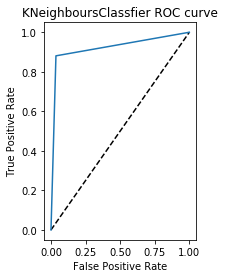

DecisionTreeClassifier	0.9443608292024754


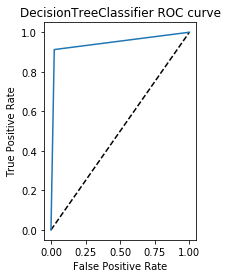

In [74]:
subplot_count = 1

for name, model in classification_models.items():
    y_pred = model.predict(X_test)
    fpr, tpr, tresholds = roc_curve(y_test, y_pred)
    
    plt.subplot(1, len(classification_models), subplot_count)
    
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr, label=name)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} ROC curve'.format(name))
    
    subplot_count += 1
    
    print('{}\t{}'.format(name, roc_auc_score(y_test, y_pred)))
    
    plt.show()

LogisticRegression AUC:	0.8316392844572199


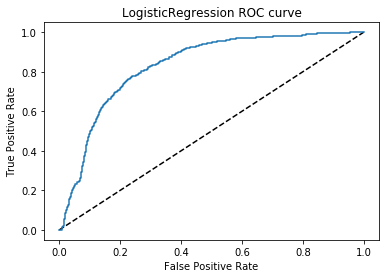

In [75]:
subplot_count = 1

for name, model in regression_models.items():
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, tresholds = roc_curve(y_test, y_pred_prob)
    
    plt.subplot(1, len(regression_models), subplot_count)
    
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr, label=name)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} ROC curve'.format(name))
    
    subplot_count += 1
    
    print('{} AUC:\t{}'.format(name, roc_auc_score(y_test, y_pred_prob)))
    plt.show()


# 4.2.3 Scaling

The accuracy scores are calculated for a standardized version of the dataset

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [77]:
for name, model in classification_models.items():
    
    steps = [
        ('scaler', StandardScaler()),
        (name, model)
    ]
    
    pipeline = Pipeline(steps)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print('{}\t{}'.format(name, accuracy_score(y_test, y_pred)))

KNeighboursClassfier	0.9466902475997979
DecisionTreeClassifier	0.9648812531581606


In [78]:
for name, model in regression_models.items():
    
    steps = [
        ('scaler', StandardScaler()),
        (name, model)
    ]
    
    pipeline = Pipeline(steps)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print('{}\t{}'.format(name, accuracy_score(y_test, y_pred)))

LogisticRegression	0.8314805457301667


### 4.2.4 Feature selection

In [79]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [80]:
pd.DataFrame(model.feature_importances_,
             index=pd.get_dummies(df.drop('left', axis=1)).columns,
             columns=['Importance'])

,Importance
satisfaction_level,0.220748
last_evaluation,0.138649
number_project,0.248671
average_monthly_hours,0.155520
time_spend_company,0.169665
work_accident_0,0.007582
work_accident_1,0.007970
promotion_last_5years_0,0.001124
promotion_last_5years_1,0.000947
salary_high,0.004892


In [81]:
columns_to_keep = [
    'satisfaction_level',
    'last_evaluation',
    'number_project',
    'time_spend_company',
    'average_monthly_hours'
]

X = df[columns_to_keep].values
y = df['left'].cat.codes.values

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [83]:
for name, model in classification_models.items():
    model.fit(X_train, y_train)
    print('{}\t{}'.format(name, model.score(X_test, y_test)))
    
for name, model in regression_models.items():
    model.fit(X_train, y_train)
    print('{}\t{}'.format(name, model.score(X_test, y_test)))

KNeighboursClassfier	0.9552804446690247
DecisionTreeClassifier	0.9676604345629105
LogisticRegression	0.8279434057604851


### 4.3 Observations

#### Simple logistic regression does not perform very well

The data points are not linearly separable

Logistic Regression however is fast to run and gives an idea initially about how hard the problem is

#### Non-linear classification algorithms outperform linear regression

A non-linear function is required to classify data points

Since simple off-the-shelf non-linear classifiers were able to perform a fair job, it is decided that algorithms capable of classifying highly non-linear data such as neural networks or SVMs coupled with custom kernels will only overfit the data

#### Feature selection improves the performance of K-Neighbors but not decision trees

Decision trees incorporates the best features inherently (since the most contributing features are involved in the decision nodes in most cases)

## 4.4 Conclusion

The dataset is non-linearly classifiable to a good degree of generalization. Hence simple non-linear classification algorithms perform well.